# Courbe des taux  <a id='Courbe des taux'></a>

In [3]:
import pandas as pd
import numpy as np

import datetime as dt
import time

import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
table_1= [(0, 6, 99.87),(0, 9, 99.65),(0, 12, 99.25),(0, 24, 99.13),(0, 36, 98.17),(0, 60, 97.86),(0, 120, 96.12)]                                      
df1= pd.DataFrame(data= table_1, columns= ["Coupon", "Maturite", "Prix"])
df1

,Coupon,Maturite,Prix
0,0,6,99.87
1,0,9,99.65
2,0,12,99.25
3,0,24,99.13
4,0,36,98.17
5,0,60,97.86
6,0,120,96.12


In [5]:
table_2= [(0, 6, 99.05),(0, 9, 98.45),(0, 12, 97.85),(0.035, 24, 101.4),(0.04, 36, 102.20)]
df2= pd.DataFrame(data= table_2, columns= ["Coupon", "Maturite", "Prix"])
df2

,Coupon,Maturite,Prix
0,0.000,6,99.05
1,0.000,9,98.45
2,0.000,12,97.85
3,0.035,24,101.40
4,0.040,36,102.20


In [6]:
df3= pd.DataFrame({
    "Type": ["BTF", "BTF", "BTF", "FRTR", "FRTR", "FRTR", "FRTR"]
    , "Coupon": [0, 0, 0, 3.25, 0, 0, 0]
    , "Maturite": pd.to_datetime(["09/01/2020", "22/04/2020"
                                 ,"12/10/2020","25/10/2021"
                                 ,"25/02/2022","25/03/2024"
                                 ,"25/11/2029"], format= '%d/%m/%Y')
    , "Prix": [100.6160, 100.3620, 100.18, 108.2940, 101.7920, 102.9090, 102.4720]
})

df3["Coupon"] = df3["Coupon"]/100

df3_maturite= [val for val in df3["Maturite"]]

t=  dt.date(day= 3, month= 10, year= 2019)
df3["Maturite"]=df3["Maturite"].apply(lambda x: (x.year - t.year)*12 + (x.month - t.month))
df3

,Type,Coupon,Maturite,Prix
0,BTF,0.0000,3,100.616
1,BTF,0.0000,6,100.362
2,BTF,0.0000,12,100.180
3,FRTR,0.0325,24,108.294
4,FRTR,0.0000,28,101.792
5,FRTR,0.0000,53,102.909
6,FRTR,0.0000,121,102.472


In [7]:
def taux(T, c, p, df_f,n=100, t=0):
    """
    T représente la maturité de l'obligation de laquelle on cherche à déterminer le taux zéro coupon
    c représente notre TAUX de coupon, il faut donc le rentrer en taux et pas en valeur
    p représente la valeur de marché de notre obligations
    df_f représente le DataFrame qui contient toutes les données des obligations poru chaque maturité
    n représente la valeur du nominal de l'obligation, par défaut prend la valeur 100
    t représente la date à laquelle on pricé nos obligations
    """
#     Dans un premier temps je vais chercher à identifier la ligne dans laquelle je suis dans mon dataframe
# étant donné les input
    #ceci me permet de récuper l'index de la ligne pour pouvoir faire jouer la récursion
    #plus tard
    ind= df_f[np.logical_and(df_f["Maturite"] == T, df_f["Prix"] == p)].index[0]
#     p= df_f["Prix"].iloc[ind]
    C= c*100
    #transformation de la maturité en année
    Tn= T/12 
    
    #toute les obligations qui ne versent pas de coupon, ou qui ont une maturité <= à 1an
    if Tn - t <= 1 :
        return pow(n/p, 1/(Tn - t)) -1 #j 'ai remplacé Tn par 1'
    
    else:
        #la récursion intervient dans ce terme <recu>
        recu= C/pow(1 + taux(df_f["Maturite"][ind-1], c, p=df_f["Prix"].iloc[ind-1], df_f = df_f), (df_f["Maturite"][ind-1]/12 - t))                              
        return pow((C+n)/(p - recu),1/(Tn-t)) - 1

In [8]:
def courbe_taux_print(df, frq):
    mpl.style.use('seaborn')
    fig, ax= plt.subplots()
    plt.grid(b= True)
    
    ax.plot(df["Maturite"]
            ,df["Taux"]
            , marker= '.'
            , markerfacecolor= 'black'
            , markersize= 9
            , c= 'orangered')

    ax.set_xlabel("Maturite (en {})".format(frq), fontsize= 12)
    ax.set_ylabel("Taux", rotation= 0, fontsize= 12)
    ax.set_title("Courbe des taux pour les obligations ", fontsize= 18)

    plt.show()

### Premier set de données
##### 1er question

   Coupon  Maturite   Prix      Taux
0       0         6  99.87  0.002605
1       0         9  99.65  0.004686
2       0        12  99.25  0.007557
3       0        24  99.13  0.004379
4       0        36  98.17  0.006175
5       0        60  97.86  0.004336
6       0       120  96.12  0.003965


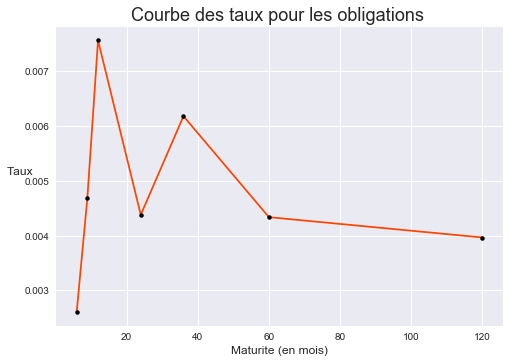

In [9]:
df1["Taux"]= df1.apply(lambda row: taux(row["Maturite"]
                                       , row["Coupon"]
                                       , row["Prix"]
                                       , df_f= df1) ,axis= 1)
print(df1)
courbe_taux_print(df1, frq= 'mois')

### Deuxième set de données
##### 2ème question

   Coupon  Maturite    Prix      Taux
0   0.000         6   99.05  0.019274
1   0.000         9   98.45  0.021047
2   0.000        12   97.85  0.021972
3   0.035        24  101.40  0.027808
4   0.040        36  102.20  0.018447


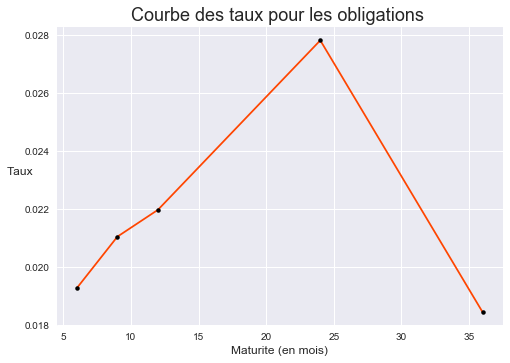

In [10]:
df2["Taux"]= df2.apply(lambda row: taux(row["Maturite"]
                                       , row["Coupon"]
                                       , row["Prix"]
                                       , df_f= df2) ,axis= 1)
print(df2)
courbe_taux_print(df2, frq= 'mois')

### Troisième set de données
##### 3ème question

   Type  Coupon  Maturite     Prix      Taux Maturite_annee
0   BTF  0.0000         3  100.616 -0.024265     2020-01-09
1   BTF  0.0000         6  100.362 -0.007201     2020-04-22
2   BTF  0.0000        12  100.180 -0.001797     2020-10-12
3  FRTR  0.0325        24  108.294 -0.008548     2021-10-25
4  FRTR  0.0000        28  101.792 -0.007583     2022-02-25
5  FRTR  0.0000        53  102.909 -0.006471     2024-03-25
6  FRTR  0.0000       121  102.472 -0.002419     2029-11-25


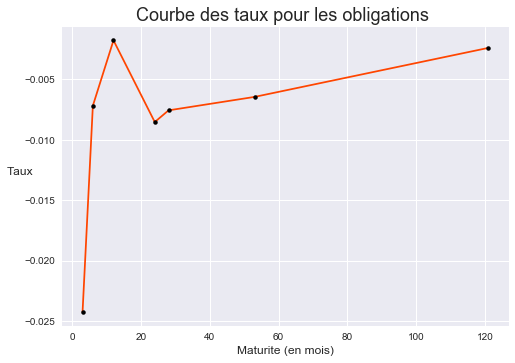

In [11]:
df3["Taux"]= df3.apply(lambda row: taux(row["Maturite"]
                                       , row["Coupon"]
                                       , row["Prix"]
                                       , df_f= df3) ,axis= 1)
df3["Maturite_annee"]= df3_maturite
print(df3)
courbe_taux_print(df3, frq= 'mois')

# Interpolation linéaire

In [12]:

def interpolation_li(df, X):
    """
    Return la sortie y de ax+b
    df: désigne les vecteurs qui vont me permettre d'interpoler, contient donc mon x et mon y
    X: désigne le vecteur à interpoler
    """
    if np.min(df["Maturite"]) > X or np.max(df["Maturite"]) < X: #si la maturite
        # n'est pas dans mon df l'output prend la valeur NaN
        return np.nan
    else:
        df= df.sort_values(["Maturite"]).reset_index(drop= True)
        comp= df["Maturite"] == X

        if sum(comp) == 0: #si cette maturité n'est pas dans mon df mais est exploitable
            sup= df[df["Maturite"] >= X].index[0]
            inf= df[df["Maturite"] <= X].index[-1]

            t_sup= df["Taux"][sup]
            t_inf= df["Taux"][inf]

            m_sup= df["Maturite"][sup]
            m_inf= df["Maturite"][inf]
            #a= (ya-yb)/(xa-xb)
            a= (t_inf-t_sup)/(m_inf-m_sup)
            b= t_sup - m_sup*a

            return a*X + b

        elif sum(comp) == 1: #si ma maturité existe 1 fois uniqement je récupére le taux dans df
            return df["Taux"][df[comp].index].item()

        else:
            #si j'ai 2 maturites egales, alors je prend le taux le plus faible
            #initialement c'était pour "lutter" contre le problème des maturités égales
            return np.min(df["Taux"][df[comp].index])

C:\Users\Wenceslas\Anaconda3\envs\cours\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: `item` has been deprecated and will be removed in a future version


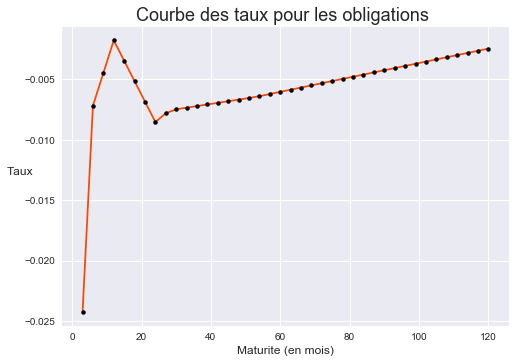

,Maturite,Taux
0,3,-0.024265
1,6,-0.007201
2,9,-0.004499
3,12,-0.001797
4,15,-0.003485
5,18,-0.005173
6,21,-0.006861
7,24,-0.008548
8,27,-0.007824
9,30,-0.007494


In [13]:
df_mat= pd.DataFrame(
{
    "Maturite": np.arange(3, 123, 3)
})

df_mat["Taux"]= df_mat.apply(lambda row: interpolation_li(df3, row[0])
                    , axis= 1)
courbe_taux_print(df_mat, frq= "mois")
df_mat

C:\Users\Wenceslas\Anaconda3\envs\cours\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: `item` has been deprecated and will be removed in a future version


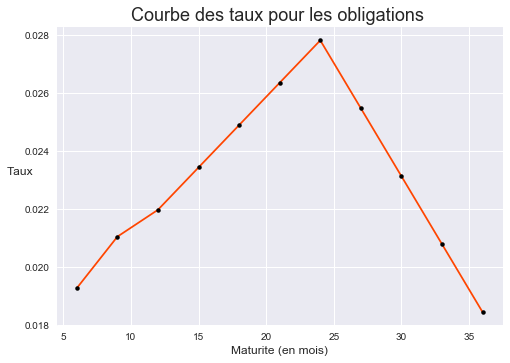

,Maturite,Taux
0,3,NaN
1,6,0.019274
2,9,0.021047
3,12,0.021972
4,15,0.023431
5,18,0.024890
6,21,0.026349
7,24,0.027808
8,27,0.025468
9,30,0.023127


In [14]:
df_mat2= pd.DataFrame(
{
    "Maturite": np.arange(3, 123, 3)
})

df_mat2["Taux"]= df_mat2.apply(lambda row: interpolation_li(df2, row[0])
                    , axis= 1)
courbe_taux_print(df_mat2, frq= "mois")
df_mat2

C:\Users\Wenceslas\Anaconda3\envs\cours\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: `item` has been deprecated and will be removed in a future version


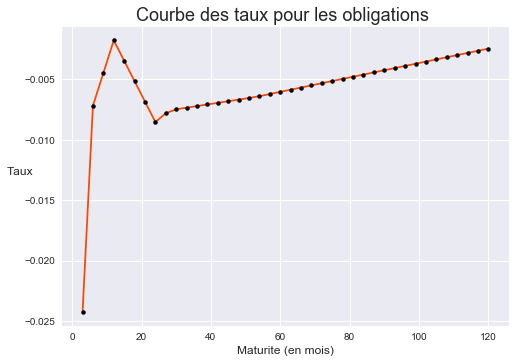

,Maturite,Taux
0,3,-0.024265
1,6,-0.007201
2,9,-0.004499
3,12,-0.001797
4,15,-0.003485
5,18,-0.005173
6,21,-0.006861
7,24,-0.008548
8,27,-0.007824
9,30,-0.007494


In [15]:
df_mat3= pd.DataFrame(
{
    "Maturite": np.arange(3, 123, 3)
})

df_mat3["Taux"]= df_mat3.apply(lambda row: interpolation_li(df3, row[0])
                    , axis= 1)
courbe_taux_print(df_mat3, frq= "mois")
df_mat3

Le problème avec l'interpolation linéaire, c'est que plus l'écart entre A et B, 2 points de coordonnées (xa, ya) et (xb, yb) tel que:
    f(xi)= yi
    pour tout i dans {a, b}
 ,moins la "précision" de notre interpolation aura de chance d'être bonne.
 
 Ce n'est pas une courbe, mais une suite de segment. C'est pourquoi une distance forte entre 2 points risque de provoquer des erreurs, et multiplié par un grand nombre d'approximation c'est pas ouf.
 
 On compare des algo, on compte le nombre d'opé elementaire de chaque algo, c'est la complexité==> interpolation lineaire simple, avec opé simple, donc complexité simple / à des algo plus gourmant en ressource.

### Spline cubique ici

In [16]:
from scipy.interpolate import interp1d

In [17]:
interp1d?

In [18]:
def interpol(df):
    """
    
    """
    f= interp1d(x=df["Maturite"]
           ,y=df["Taux"]
           ,kind='cubic')
    
    df_out= pd.DataFrame()
    mat_x= np.arange(np.min(df["Maturite"]), np.max(df["Maturite"])+3, 3)
    df_out["Maturite"]= mat_x
    df_out["Taux"]= f(mat_x)
    return df_out
    

C:\Users\Wenceslas\Anaconda3\envs\cours\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


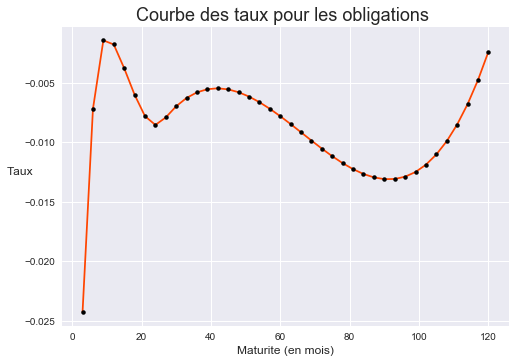

In [19]:
df3["Maturite"][df3["Maturite"].idxmax()]= 120
courbe_taux_print(interpol(df3), frq='mois')

[ 2.60507880e-03  4.68579661e-03  7.55667506e-03  8.41289708e-03
  7.49811262e-03  5.81808839e-03  4.37859111e-03  3.95154827e-03
  4.37353049e-03  5.24726915e-03  6.17549566e-03  6.83212342e-03
  7.17579394e-03  7.23633075e-03  7.04355738e-03  6.62729735e-03
  6.01737421e-03  5.24361147e-03  4.33583267e-03  3.32386133e-03
  2.23752098e-03  1.10663516e-03 -3.89726099e-05 -1.16947880e-03
 -2.25505988e-03 -3.26589232e-03 -4.17215259e-03 -4.94401716e-03
 -5.55166251e-03 -5.96526510e-03 -6.15500141e-03 -6.09104790e-03
 -5.74358105e-03 -5.08277733e-03 -4.07881321e-03 -2.70186516e-03
 -9.22109644e-04  1.29027686e-03  3.96511787e-03]
   Coupon  Maturite   Prix      Taux
0       0         6  99.87  0.002605
1       0         9  99.65  0.004686
2       0        12  99.25  0.007557
3       0        24  99.13  0.004379
4       0        36  98.17  0.006175
5       0        60  97.86  0.004336
6       0       120  96.12  0.003965


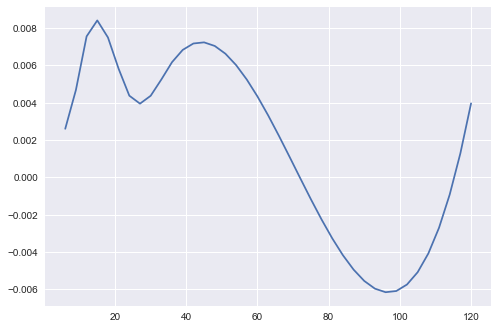

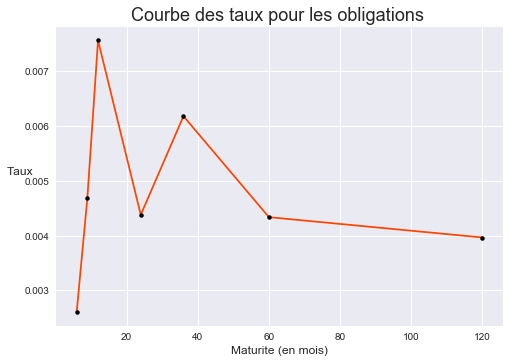

C:\Users\Wenceslas\Anaconda3\envs\cours\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: `item` has been deprecated and will be removed in a future version


    Maturite      Taux
1          6  0.002605
2          9  0.004686
3         12  0.007557
4         15  0.006762
5         18  0.005968
6         21  0.005173
7         24  0.004379
8         27  0.004828
9         30  0.005277
10        33  0.005726
11        36  0.006175
12        39  0.005946
13        42  0.005716
14        45  0.005486
15        48  0.005256
16        51  0.005026
17        54  0.004796
18        57  0.004566
19        60  0.004336
20        63  0.004317
21        66  0.004299
22        69  0.004280
23        72  0.004262
24        75  0.004243
25        78  0.004225
26        81  0.004206
27        84  0.004188
28        87  0.004169
29        90  0.004150
30        93  0.004132
31        96  0.004113
32        99  0.004095
33       102  0.004076
34       105  0.004058
35       108  0.004039
36       111  0.004021
37       114  0.004002
38       117  0.003984
39       120  0.003965


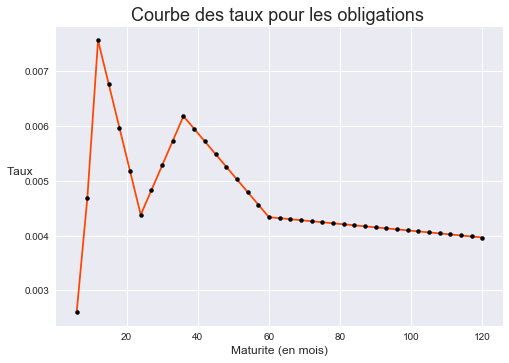

In [20]:
#attention ca ne marche pas pour les X qui sont en double
#en gros 1 X donne uniquement 1 Y (injectivité ?????)

#ici ca marche qu'avec le df1
dfed= df1.sort_values(["Maturite"]) #attention il faut sort le df
f= interp1d(x=dfed["Maturite"]
           ,y=dfed["Taux"]
           ,kind='cubic')

mat_x= np.arange(np.min(dfed["Maturite"]), np.max(dfed["Maturite"])+3, 3)
#methode du spline cubique
print(f(mat_x))
plt.plot(mat_x, f(mat_x))

#ici la méthode normale
print(df1)
courbe_taux_print(df1, frq= 'mois')

#méthode interpolation linéaire
df_mat1= pd.DataFrame(
{
    "Maturite": np.arange(3, 123, 3)
})

df_mat1["Taux"]= df_mat1.apply(lambda row: interpolation_li(df1, row[0])
                    , axis= 1)
print(df_mat1.dropna())
courbe_taux_print(df_mat1, frq= "mois")


limite spline cubique:
tendance à courber ==> le problème c'est que si les poins à interpoler sont éloigné (cf df3) alors on a une courbe qui n'a pas vraiment de sens ==> Comme pour l'interpolation linéaire, c'est une méthode d'estimation qui semble intressante mais uniquement localement.

FOndé localement sur un polynome ==>


==> on pourrait travailler sur

In [21]:

def interpol(df):
    """
    
    """
    f= interp1d(x=df["Maturite"]
           ,y=df["Taux"]
           ,kind='cubic')
    
    df_out= pd.DataFrame()
    mat_x= np.arange(np.min(df["Maturite"]), np.max(df["Maturite"])+3, 3)
    df_out["Maturite"]= mat_x
    df_out["Taux"]= f(mat_x)
    return df_out

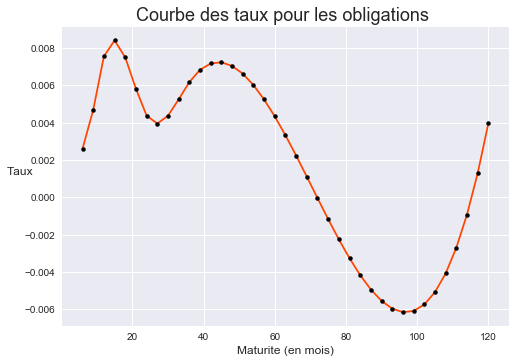

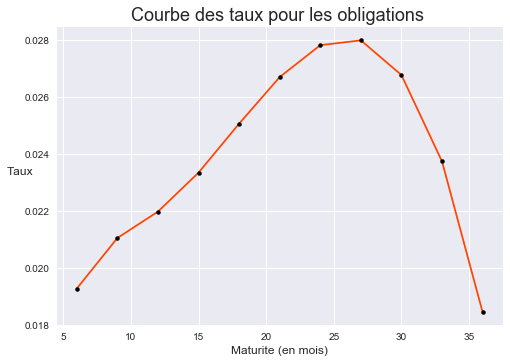

C:\Users\Wenceslas\Anaconda3\envs\cours\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


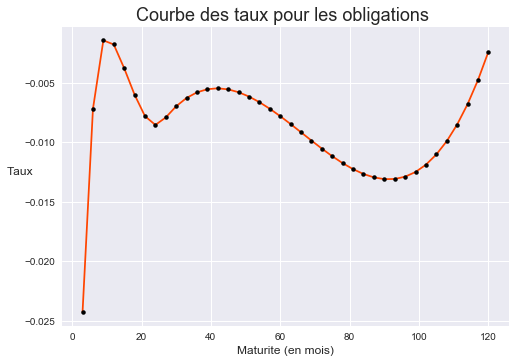

In [22]:

##############
##############spline pour mon df1
courbe_taux_print(interpol(df1), frq='mois')


##############
##############spline pour mon df2
courbe_taux_print(interpol(df2), frq='mois')


##############
##############spline pour mon df3
#pour des raisons d'arrondi lié à ma transformation
#de la maturité delta date en mois je dois enlever 1 mois à la dernière maturite
df3["Maturite"][df3["Maturite"].idxmax()]= 120
courbe_taux_print(interpol(df3), frq='mois')


In [23]:
interpol(df2)

,Maturite,Taux
0,6,0.019274
1,9,0.021047
2,12,0.021972
3,15,0.023338
4,18,0.025055
5,21,0.026690
6,24,0.027808
7,27,0.027976
8,30,0.026762
9,33,0.023730


### Valorisation obligation
Input: courbe 0coupon , nominal, maturite, tc

In [24]:
def valorisation_oblig(courbe, m, c, n= 100):
    """
    Permet de déterminer le prix d'achat d'une obligation
    courbe: représente notre courbe des taux, un df avec une col "Taux" associé à chaque maturité
        comprise entre 3 et 120 mois (inclus)
    m: désigne la maturité de l'obligation a pricer
    c: le taux de coupon de notre obligation
    n: c'est la valeur nominale de l'obligation, default= 100
    """
    C= c*n
    Tn= m/12
    ind= courbe[courbe["Maturite"] == m].index
    mat_annee= pd.DataFrame(
    {
        "Maturite": np.array(np.arange(12, 132, 12))
    })
    
    matu_annee= mat_annee[mat_annee["Maturite"] < m].values
    ind_sup = courbe[courbe["Maturite"] >= m].index[0]
    
    if C == 0 or Tn <= 1:
        return n/pow(1+courbe["Taux"][ind].values, Tn)
    else:
        val= [C/pow(1+courbe[courbe["Maturite"] == i[0]]["Taux"].values, i[0]/12) \
              for i in matu_annee]
        proportion= 1 - (courbe["Maturite"][ind_sup] - m)/12
        return (proportion*C+n)/pow(1+courbe["Taux"][ind].values, Tn) + sum(val)

In [25]:
valorisation_oblig(interpol(df2)
                   ,m= 36
                   ,c= 0.04
                  )

array([106.15102155])